## Reading Test Scores ##

The Programme for International Student Assessment (PISA) is a test given every three years to 15-year-old students from around the world to evaluate their performance in mathematics, reading, and science. This test provides a quantitative way to compare the performance of students from different parts of the world. In this homework assignment, we will predict the reading scores of students from the United States of America on the 2009 PISA exam.

### The Data ###
The datasets pisa2009train.csv and pisa2009test.csv contain information about the demographics and schools for American students taking the exam, derived from 2009 PISA Public-Use Data Files distributed by the United States National Center for Education Statistics (NCES). While the datasets are not supposed to contain identifying information about students taking the test, by using the data you are bound by the NCES data use agreement, which prohibits any attempt to determine the identity of any student in the datasets.

Each row in the datasets pisa2009train.csv and pisa2009test.csv represents one student taking the exam. The datasets have the following variables:

grade: The grade in school of the student (most 15-year-olds in America are in 10th grade)

male: Whether the student is male (1/0)

raceeth: The race/ethnicity composite of the student

preschool: Whether the student attended preschool (1/0)

expectBachelors: Whether the student expects to obtain a bachelor's degree (1/0)

motherHS: Whether the student's mother completed high school (1/0)

motherBachelors: Whether the student's mother obtained a bachelor's degree (1/0)

motherWork: Whether the student's mother has part-time or full-time work (1/0)

fatherHS: Whether the student's father completed high school (1/0)

fatherBachelors: Whether the student's father obtained a bachelor's degree (1/0)

fatherWork: Whether the student's father has part-time or full-time work (1/0)

selfBornUS: Whether the student was born in the United States of America (1/0)

motherBornUS: Whether the student's mother was born in the United States of America (1/0)

fatherBornUS: Whether the student's father was born in the United States of America (1/0)

englishAtHome: Whether the student speaks English at home (1/0)

computerForSchoolwork: Whether the student has access to a computer for schoolwork (1/0)

read30MinsADay: Whether the student reads for pleasure for 30 minutes/day (1/0)

minutesPerWeekEnglish: The number of minutes per week the student spend in English class

studentsInEnglish: The number of students in this student's English class at school

schoolHasLibrary: Whether this student's school has a library (1/0)

publicSchool: Whether this student attends a public school (1/0)

urban: Whether this student's school is in an urban area (1/0)

schoolSize: The number of students in this student's school

readingScore: The student's reading score, on a 1000-point scale

### Exploratory Data Analysis ###

In [100]:
train = read.csv("pisa2009train.csv")
test = read.csv("pisa2009test.csv")

In [101]:
str(train)

'data.frame':	3663 obs. of  24 variables:
 $ grade                : int  11 11 9 10 10 10 10 10 9 10 ...
 $ male                 : int  1 1 1 0 1 1 0 0 0 1 ...
 $ raceeth              : Factor w/ 7 levels "American Indian/Alaska Native",..: NA 7 7 3 4 3 2 7 7 5 ...
 $ preschool            : int  NA 0 1 1 1 1 0 1 1 1 ...
 $ expectBachelors      : int  0 0 1 1 0 1 1 1 0 1 ...
 $ motherHS             : int  NA 1 1 0 1 NA 1 1 1 1 ...
 $ motherBachelors      : int  NA 1 1 0 0 NA 0 0 NA 1 ...
 $ motherWork           : int  1 1 1 1 1 1 1 0 1 1 ...
 $ fatherHS             : int  NA 1 1 1 1 1 NA 1 0 0 ...
 $ fatherBachelors      : int  NA 0 NA 0 0 0 NA 0 NA 0 ...
 $ fatherWork           : int  1 1 1 1 0 1 NA 1 1 1 ...
 $ selfBornUS           : int  1 1 1 1 1 1 0 1 1 1 ...
 $ motherBornUS         : int  0 1 1 1 1 1 1 1 1 1 ...
 $ fatherBornUS         : int  0 1 1 1 0 1 NA 1 1 1 ...
 $ englishAtHome        : int  0 1 1 1 1 1 1 1 1 1 ...
 $ computerForSchoolwork: int  1 1 1 1 1 1 1 1 1 1 ...
 $ re

In [102]:
summary(train)

     grade            male                      raceeth       preschool     
 Min.   : 8.00   Min.   :0.0000   White             :2015   Min.   :0.0000  
 1st Qu.:10.00   1st Qu.:0.0000   Hispanic          : 834   1st Qu.:0.0000  
 Median :10.00   Median :1.0000   Black             : 444   Median :1.0000  
 Mean   :10.09   Mean   :0.5111   Asian             : 143   Mean   :0.7228  
 3rd Qu.:10.00   3rd Qu.:1.0000   More than one race: 124   3rd Qu.:1.0000  
 Max.   :12.00   Max.   :1.0000   (Other)           :  68   Max.   :1.0000  
                                  NA's              :  35   NA's   :56      
 expectBachelors     motherHS    motherBachelors    motherWork    
 Min.   :0.0000   Min.   :0.00   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:1.00   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.00   Median :0.0000   Median :1.0000  
 Mean   :0.7859   Mean   :0.88   Mean   :0.3481   Mean   :0.7345  
 3rd Qu.:1.0000   3rd Qu.:1.00   3rd Qu.:1.0000  

Our data set is far from complete. The columns below are missing values for one or more observations. For the moment, we will remove incomplete observations. Later, we will turn to Multiple Imputation with Chained Equations (MICE) to examine the effect this approach to coping with missing values influences our model and results.

In [103]:
na_values = colnames(train)[apply(is.na(train), 2, any)]
na_values

[1] "raceeth"               "preschool"             "expectBachelors"      
 [4] "motherHS"              "motherBachelors"       "motherWork"           
 [7] "fatherHS"              "fatherBachelors"       "fatherWork"           
[10] "selfBornUS"            "motherBornUS"          "fatherBornUS"         
[13] "englishAtHome"         "computerForSchoolwork" "read30MinsADay"       
[16] "minutesPerWeekEnglish" "studentsInEnglish"     "schoolHasLibrary"     
[19] "schoolSize"

In [104]:
train2 = na.omit(train)
test2 = na.omit(test)

In [105]:
na_values = colnames(train2)[apply(is.na(train2), 2, any)]
na_values

character(0)

Performance differences between the sexes are always a topic of conversation. The data below demonstrate that in 2009 female students outperformed male students on the exam by a respectable margin.

In [106]:
round(tapply(train2$readingScore, train2$male, mean), 2)

0      1 
529.46 506.52

There is also a distinctive point spread among the top and bottom three racial/ethinic groups taking the test in 2009.

In [107]:
sort(round(tapply(train2$readingScore, train2$raceeth, mean),2), decreasing=TRUE)

Asian                                  White 
                                549.16                                 536.73 
Native Hawaiian/Other Pacific Islander                     More than one race 
                                534.71                                 517.18 
                              Hispanic                                  Black 
                                484.54                                 462.62 
         American Indian/Alaska Native 
                                443.08

In [108]:
# Need x tabs of avg race performance by sex
mytable = xtabs(readingScore~raceeth+male, data=train2)
ftable(mytable) # print table


                                       male         0         1
raceeth                                                        
American Indian/Alaska Native                 3757.35   5104.29
Asian                                        28372.27  23797.51
Black                                        62829.22  42647.53
Hispanic                                    121632.56 120638.53
More than one race                           20663.52  21227.80
Native Hawaiian/Other Pacific Islander        3287.43   7406.79
White                                       396931.91 392065.70

### The Model ###

We are forecasting a continuous variable amenable to a linear model, so we will pursue a multiple regression strategy. We begin by setting the reference level for our **raceeth** factor variable to the most frequent observation.

In [144]:
train2$raceeth = relevel(train2$raceeth, "White")
test2$raceeth = relevel(test2$raceeth, "White")

Having set our reference level, let's see what a model containing all predictors yields. This may assist us in determining variable importance.

In [110]:
linReg1 = lm(readingScore ~ ., data=train2)

In [111]:
summary(linReg1)


Call:
lm(formula = readingScore ~ ., data = train2)

Residuals:
    Min      1Q  Median      3Q     Max 
-247.44  -48.86    1.86   49.77  217.18 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                   143.766333  33.841226   4.248
grade                                          29.542707   2.937399  10.057
male                                          -14.521653   3.155926  -4.601
raceethAmerican Indian/Alaska Native          -67.277327  16.786935  -4.008
raceethAsian                                   -4.110325   9.220071  -0.446
raceethBlack                                  -67.012347   5.460883 -12.271
raceethHispanic                               -38.975486   5.177743  -7.528
raceethMore than one race                     -16.922522   8.496268  -1.992
raceethNative Hawaiian/Other Pacific Islander  -5.101601  17.005696  -0.300
preschool                                      -4.463670   3.486055  -1.280
ex

The $R^{2}$ is a low $0.3251$. This suggests the predictive problem under consideration is more complex than one would have initially thought. Interestingly, not nearly as many variables in the model are as significant as we expected. Note, however, that sex (i.e., **male** and **raceeth** are statistically significant as observed in the above tables). 

In [112]:
linReg1_pred = predict(linReg1)

In [113]:
rmse = round(sqrt(mean((train2$readingScore - linReg1_pred)^2)),4)
rmse_baseline = round(sqrt(mean((train2$readingScore - mean(train2$readingScore))^2)),4)

cat(paste("The in-sample RMSE of our model is", round(rmse,2), "versus a baseline RMSE of", round(rmse_baseline,2),"."))

The in-sample RMSE of our model is 73.37 versus a baseline RMSE of 89.31 .

The RMSE of our model compares favorably to that which would produced by a baseline prediction using the mean value for our response variable, **readingScore**, in our dataset.

Before making adjustments to our model, we'll look at its out-of-sample performance.

In [114]:
linReg1_predTest = predict(linReg1, newdata=test2)

In [115]:
rmse_test = sqrt(mean(((test2$readingScore - linReg1_predTest)^2)))
rmse_baseline_test = round(sqrt(mean((test2$readingScore - mean(test2$readingScore))^2)),4)
cat(paste("The out-of-sample RMSE of our model is", round(rmse_test,2), "versus an out-of-sample baseline RMSE of", round(rmse_baseline_test,2),"."))

The out-of-sample RMSE of our model is 76.29 versus an out-of-sample baseline RMSE of 88.76 .

In [117]:
sse = sum((test2$readingScore - linReg1_predTest)^2)
sst = sum((test2$readingScore - mean(train2$readingScore))^2)
r_square = (1-sse/sst)
cat(paste('The R-Squared for our model is:', round(r_square, 4), "."))

The R-Squared for our model is: 0.2615 .

As expected, we witnessed a performance degredation when testing our model in an out-of-sample context (i.e., the context that truly matters). Still, model performance on the test set was not abysmal. But can we do better? Here, we try to improve our results via variable selection.

### Beyond the Assignment: Model Improvement ###

We begin by changing how we cope with missing data. Recall that the model above was trained and tested on data sets from which incomplete observations were removed. This is a legitimate strategy for handling a paucity of missing values, albeit with the obvious downside that the model will be trained having seen only records that are 100% complete. Multiple Imputation by Chained Equations (a/k/a "MICE") represents an alternative strategy to resolving the issue of missing values. While the underlying math is complex, the idea is simple: MICE uses predictor variables to impute (i.e., forecast) missing data points. A dataframe that has been processed using MICE is not only complete, but also contains statistically meaningful values for what would otherwise be absent data that are a cut above alternative methodologies (e.g., substituting the vector average for missing data, inserting the most frequently observed observation). 

In [121]:
install.packages("mice")
library(mice)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [131]:
install.packages("corrplot")
library("corrplot")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
corrplot 0.84 loaded


In [125]:
train = read.csv("pisa2009train.csv")
test = read.csv("pisa2009test.csv")

In [126]:
na_predictors_train = colnames(train)[apply(is.na(train), 2, any)]
na_predictors_train

[1] "raceeth"               "preschool"             "expectBachelors"      
 [4] "motherHS"              "motherBachelors"       "motherWork"           
 [7] "fatherHS"              "fatherBachelors"       "fatherWork"           
[10] "selfBornUS"            "motherBornUS"          "fatherBornUS"         
[13] "englishAtHome"         "computerForSchoolwork" "read30MinsADay"       
[16] "minutesPerWeekEnglish" "studentsInEnglish"     "schoolHasLibrary"     
[19] "schoolSize"

In [127]:
na_data_train = train[c(na_predictors_train)]
summary(na_data_train)
set.seed(1024)
imputed = complete(mice(na_data_train))

               raceeth       preschool      expectBachelors     motherHS   
 White             :2015   Min.   :0.0000   Min.   :0.0000   Min.   :0.00  
 Hispanic          : 834   1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:1.00  
 Black             : 444   Median :1.0000   Median :1.0000   Median :1.00  
 Asian             : 143   Mean   :0.7228   Mean   :0.7859   Mean   :0.88  
 More than one race: 124   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.00  
 (Other)           :  68   Max.   :1.0000   Max.   :1.0000   Max.   :1.00  
 NA's              :  35   NA's   :56       NA's   :62       NA's   :97    
 motherBachelors    motherWork        fatherHS      fatherBachelors 
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:0.0000  
 Median :0.0000   Median :1.0000   Median :1.0000   Median :0.0000  
 Mean   :0.3481   Mean   :0.7345   Mean   :0.8593   Mean   :0.3319  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.00


 iter imp variable
  1   1  raceeth  preschool  expectBachelors  motherHS  motherBachelors  motherWork  fatherHS  fatherBachelors  fatherWork  selfBornUS  motherBornUS  fatherBornUS  englishAtHome  computerForSchoolwork  read30MinsADay  minutesPerWeekEnglish  studentsInEnglish  schoolHasLibrary  schoolSize
  1   2  raceeth  preschool  expectBachelors  motherHS  motherBachelors  motherWork  fatherHS  fatherBachelors  fatherWork  selfBornUS  motherBornUS  fatherBornUS  englishAtHome  computerForSchoolwork  read30MinsADay  minutesPerWeekEnglish  studentsInEnglish  schoolHasLibrary  schoolSize
  1   3  raceeth  preschool  expectBachelors  motherHS  motherBachelors  motherWork  fatherHS  fatherBachelors  fatherWork  selfBornUS  motherBornUS  fatherBornUS  englishAtHome  computerForSchoolwork  read30MinsADay  minutesPerWeekEnglish  studentsInEnglish  schoolHasLibrary  schoolSize
  1   4  raceeth  preschool  expectBachelors  motherHS  motherBachelors  motherWork  fatherHS  fatherBachelors  f

In [128]:
summary(imputed)

                                   raceeth       preschool     
 American Indian/Alaska Native         :  37   Min.   :0.0000  
 Asian                                 : 145   1st Qu.:0.0000  
 Black                                 : 448   Median :1.0000  
 Hispanic                              : 846   Mean   :0.7224  
 More than one race                    : 125   3rd Qu.:1.0000  
 Native Hawaiian/Other Pacific Islander:  31   Max.   :1.0000  
 White                                 :2031                   
 expectBachelors     motherHS      motherBachelors    motherWork    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :0.0000   Median :1.0000  
 Mean   :0.7851   Mean   :0.8788   Mean   :0.3464   Mean   :0.7346  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
     

In [129]:
assign = function (imputed_df, df2) {
    
    # Input: One MICE imputed data frame "imputed_df"
    # and the original data frame from which it was derived.
    #
    # Output: Original data frame with MICE values overwriting
    # original column vectors of the same name
    
    imputed_cols = names(imputed_df) 
    
    for (column in imputed_cols) {
        df2[column] = imputed_df[column]
    }
    
    return (df2)
}

train = assign(imputed, train)


In [145]:
train$raceeth = relevel(train$raceeth, "White")

In [130]:
summary(train)

     grade            male                                          raceeth    
 Min.   : 8.00   Min.   :0.0000   American Indian/Alaska Native         :  37  
 1st Qu.:10.00   1st Qu.:0.0000   Asian                                 : 145  
 Median :10.00   Median :1.0000   Black                                 : 448  
 Mean   :10.09   Mean   :0.5111   Hispanic                              : 846  
 3rd Qu.:10.00   3rd Qu.:1.0000   More than one race                    : 125  
 Max.   :12.00   Max.   :1.0000   Native Hawaiian/Other Pacific Islander:  31  
                                  White                                 :2031  
   preschool      expectBachelors     motherHS      motherBachelors 
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:1.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :1.0000   Median :0.0000  
 Mean   :0.7224   Mean   :0.7851   Mean   :0.8788   Mean   :0.3464  
 3rd Qu.:1.0000

The output above demonstrates we have dispatched all missing values in our training set. We will continue to use the test set from the previous modelling effort to facilitate comparability of results.

We now turn our attention to identifying possible instances of multicollinearity.  

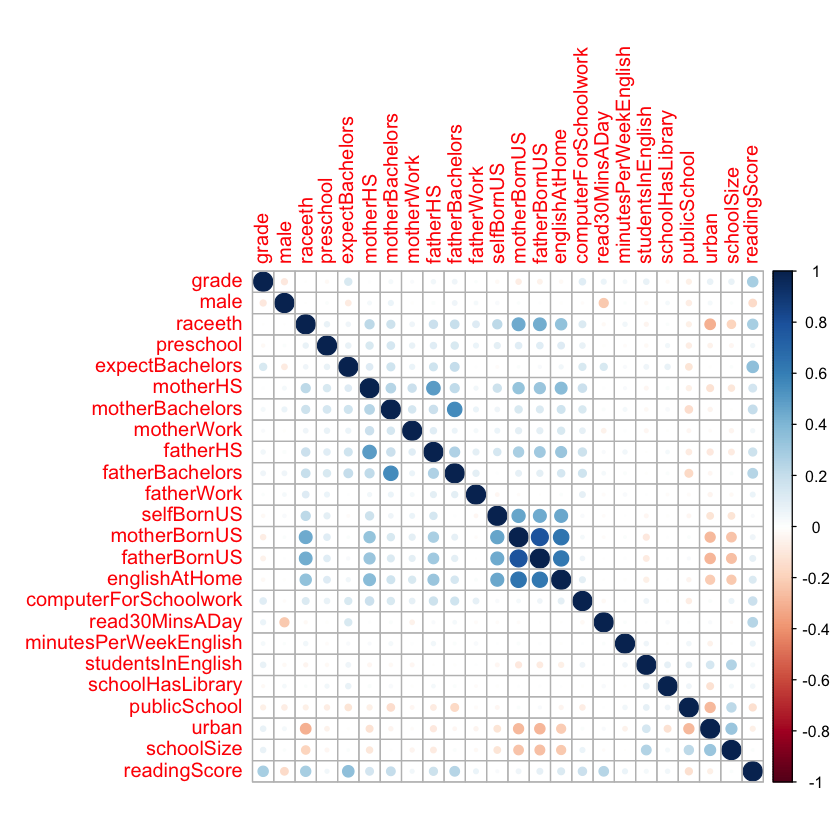

In [134]:
train_for_corr = train
train_for_corr$raceeth = as.numeric(train_for_corr$raceeth) 
corrplot(cor(train_for_corr, use="complete.obs"))

The predictors **motherBornUS** and **englishAtHome** are highly correlated with **fatherBornUS**. This makes sense; each variable speaks to the student's home life. We will drop **fatherBornUs** to improve our situation. While **motherBornUS** and **englshAtHome** are highly correlated, getting rid of both parents, or one parent and the **englishAtHome** variable seems excessive. 

In [143]:
train$fatherBornUS = NULL
test2$fatherBornUS = NULL

We are now ready to retrain our model.

In [146]:
linReg2 = lm(readingScore ~ ., data=train)

In [148]:
summary(linReg2)


Call:
lm(formula = readingScore ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-281.881  -50.734    2.378   52.638  234.695 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                    95.137297  26.880475   3.539
grade                                          34.182001   2.354939  14.515
male                                          -16.623924   2.643230  -6.289
raceethAmerican Indian/Alaska Native          -62.580753  12.859084  -4.867
raceethAsian                                    0.694547   7.589861   0.092
raceethBlack                                  -73.828377   4.198280 -17.585
raceethHispanic                               -41.557717   4.167915  -9.971
raceethMore than one race                     -23.181166   7.105865  -3.262
raceethNative Hawaiian/Other Pacific Islander -18.231584  14.178447  -1.286
preschool                                      -3.643231   2.910999  

By using MICE and removing one multicollinear feature, we improved our $R^{2}$ by $11.3\%$ and Adjusted-$R^{2}$ by $12.5\%$. We'll now evaluate the model in an out-of-sample environment.

In [163]:
linReg2_predTest = predict(linReg2, newdata=test2)

In [164]:
rmse_test_lr2 = sqrt(mean(((test2$readingScore - linReg2_predTest)^2)))
rmse_baseline_test_lr2 = round(sqrt(mean((test2$readingScore - mean(test2$readingScore))^2)),4)
cat(paste("The out-of-sample RMSE of our model is", round(rmse_test_lr2,2), "versus an out-of-sample baseline RMSE of", round(rmse_baseline_test_lr2,2),"."))

The out-of-sample RMSE of our model is 77.78 versus an out-of-sample baseline RMSE of 88.76 .

In [166]:
sse = sum((test2$readingScore - linReg2_predTest)^2)
sst = sum((test2$readingScore - mean(train2$readingScore))^2)
r_square = (1-sse/sst)
cat(paste('The R-Squared for our model is:', round(r_square, 4), "."))

The R-Squared for our model is: 0.2325 .

Predictably, the out-of-sample $R^{2}$ took a hit due to the elimination of a feature vector. Our RMSE, however, edged north only 1.5 points. We'll now see what our results look like when we eliminate superfluous predictors from our model and keep only those at the .001 significance level. 

In [152]:
linReg3 = lm(readingScore ~ grade + male + raceeth + expectBachelors + fatherBachelors + englishAtHome + computerForSchoolwork + read30MinsADay + publicSchool + schoolSize, data=train)

In [153]:
summary(linReg3)


Call:
lm(formula = readingScore ~ grade + male + raceeth + expectBachelors + 
    fatherBachelors + englishAtHome + computerForSchoolwork + 
    read30MinsADay + publicSchool + schoolSize, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-276.693  -50.648    2.094   51.824  240.573 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                   103.636395  25.031552   4.140
grade                                          34.334824   2.353995  14.586
male                                          -15.894394   2.640530  -6.019
raceethAmerican Indian/Alaska Native          -63.498263  12.869731  -4.934
raceethAsian                                    3.990997   6.943201   0.575
raceethBlack                                  -76.107389   4.069847 -18.700
raceethHispanic                               -43.464673   3.781053 -11.495
raceethMore than one race                     -22.986659   7.103202  

The above results are interesting. Counting **raceeth** as a single variable, we went from a model trained on 23 predictors to that relies on only 10. Removing predictors always influences both $R^{2}$ metrics, and ours declined by approximately $1\%$. We believe this is a vanishingly small price to pay in predictive power relative to the gains we've made with respect to parsimony.

In [156]:
linReg3_pred = predict(linReg3)

In [158]:
rmse_lr3 = round(sqrt(mean((train$readingScore - linReg3_pred)^2)),4)
rmse_baseline_lr3 = round(sqrt(mean((train$readingScore - mean(train$readingScore))^2)),4)

cat(paste("The in-sample RMSE of our model is", round(rmse_lr3,2), "versus a baseline RMSE of", round(rmse_baseline_lr3,2),"."))

The in-sample RMSE of our model is 76.72 versus a baseline RMSE of 95.5 .

In [160]:
linReg3_predTest = predict(linReg3, newdata=test2)

In [161]:
rmse_test_lr3 = sqrt(mean(((test2$readingScore - linReg3_predTest)^2)))
rmse_baseline_test_lr3 = round(sqrt(mean((test2$readingScore - mean(test2$readingScore))^2)),4)
cat(paste("The out-of-sample RMSE of our model is", round(rmse_test_lr3,2), "versus an out-of-sample baseline RMSE of", round(rmse_baseline_test_lr3,2),"."))

The out-of-sample RMSE of our model is 77.51 versus an out-of-sample baseline RMSE of 88.76 .

In [162]:
sse = sum((test2$readingScore - linReg3_predTest)^2)
sst = sum((test2$readingScore - mean(train2$readingScore))^2)
r_square = (1-sse/sst)
cat(paste('The R-Squared for our model is:', round(r_square, 4), "."))

The R-Squared for our model is: 0.2377 .

While the gains relative to our second model aren't huge, they do exist. We have increased our out-of-sample $R^{2}$ and decreased our out-of-sample RMSE. 

**To summarize, our "everything-but-the-kitchen-sink" model certainly had predictive merit. We built upon this success in three ways. First, we replaced missing data using multiple imputation by chained equations (MICE). Second,  corrected our model's structure for multicollinarity (threshold >= .70). Lastly, we removed statistically insignificant varaibles.**